In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sn

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier

## Concatenando os data frames de perguntas em um só

É adicionada uma coluna extra final_weight que é a multiplicação da porcentagem das respostas para uma pergunta e o peso dela.

In [2]:
df_DailyLife = pd.read_csv('Data/weighted-survey-data-2012/DailyLife.csv')
df_Discrimination = pd.read_csv('Data/weighted-survey-data-2012/Discrimination.csv')
df_RightsAwareness = pd.read_csv('Data/weighted-survey-data-2012/RightsAwareness.csv')
df_ViolenceAndHarassment = pd.read_csv('Data/weighted-survey-data-2012/ViolenceAndHarassment.csv')


df = pd.concat([df_DailyLife, df_Discrimination, df_RightsAwareness, df_ViolenceAndHarassment])

df['final_weight'] = df.apply(lambda row: row.percentage * row.weight, axis=1)

## Limpando para deixar apenas as colunas que nos interessam

In [3]:
df = df[['CountryName', 'subset', 'question_code', 'final_weight']]
df.head()

,CountryName,subset,question_code,final_weight
0,Austria,Lesbian,b1_a,-8.0
1,Austria,Lesbian,b1_a,-17.0
2,Austria,Lesbian,b1_a,22.5
3,Austria,Lesbian,b1_a,9.0
4,Austria,Gay,b1_a,-4.0


## Passando os dados categóricos para dados numéricos

Question_code

In [4]:
id_old = df['question_code'].unique()
id_new = list(range(len(id_old)))
    
df = df.replace(id_old, id_new)
df.head()

,CountryName,subset,question_code,final_weight
0,Austria,Lesbian,0,-8.0
1,Austria,Lesbian,0,-17.0
2,Austria,Lesbian,0,22.5
3,Austria,Lesbian,0,9.0
4,Austria,Gay,0,-4.0


CountryName

In [5]:
pais_old = df['CountryName'].unique()
pais_new = list(range(len(pais_old)))
    
df = df.replace(pais_old, pais_new)
df.head()

,CountryName,subset,question_code,final_weight
0,0,Lesbian,0,-8.0
1,0,Lesbian,0,-17.0
2,0,Lesbian,0,22.5
3,0,Lesbian,0,9.0
4,0,Gay,0,-4.0


## Agrupando para a soma de final_weight 

In [6]:
group = df.groupby(by=['CountryName', 'subset', 'question_code']).sum().reset_index()
group.head()

,CountryName,subset,question_code,final_weight
0,0,Bisexual men,0,28.5
1,0,Bisexual men,1,-36.0
2,0,Bisexual men,2,14.5
3,0,Bisexual men,3,43.5
4,0,Bisexual men,4,-50.5


## Fazendo o KNN para classificar o subset baseado no question_code e final_weight

In [7]:
y = group['subset']
x = group[['question_code', 'final_weight']]

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

In [9]:
params = { 
    'n_neighbors': [3, 5, 7, 9, 11]
}

classifier = GridSearchCV(KNeighborsClassifier(), params)
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

print(classifier.best_params_)
print(accuracy_score(y_test, y_pred))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


{'n_neighbors': 5}
0.2665036674816626


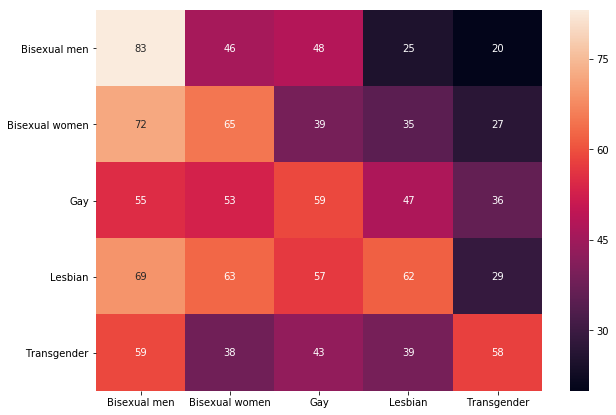

In [15]:
confusion = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(confusion, index = y.unique(), columns = y.unique())
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)